# Table of content

1. Importing libraries

2. Importing data

3. Sales findings

4. Customer loyalty

5. Expenditure by hour

6. Customer demographics

        Age vs family situation

# 01. Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
# Creating a shortcut path
path = path = r'C:\Users\henri\Documents\Tonia\Learning\CarrrerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\henri\\Documents\\Tonia\\Learning\\CarrrerFoundry\\Data Immersion\\Achievement 4\\Instacart Basket Analysis'

In [4]:
# Importing instacart.pkl
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart.pkl'))

In [5]:
# Checking the first 5 rows of the df:
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
# Dimensions of the dataframe
instacart.shape

(32404859, 33)

# 03. Sales findings

## Task 3

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

    In a markdown cell beneath your histogram, describe what the histogram demonstrates.


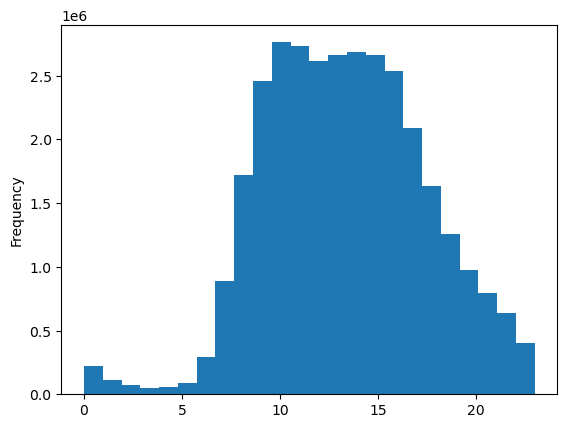

In [10]:
# Creating a histogram of the "order_hour_of_day" column:
hist_order_hour = instacart['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows the frequency of the orders per hour of the day. We can easily see that the highest number of orders are placed between 9h and 16h. Customers place the least orders between 0h and 6h. Below is shown a table with the exact order numbers per hour.

In [15]:
# Creating the frequency table:
instacart['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

In [11]:
# Exporting the histogram:
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

# 04. Customer loyalty

## Task 4

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

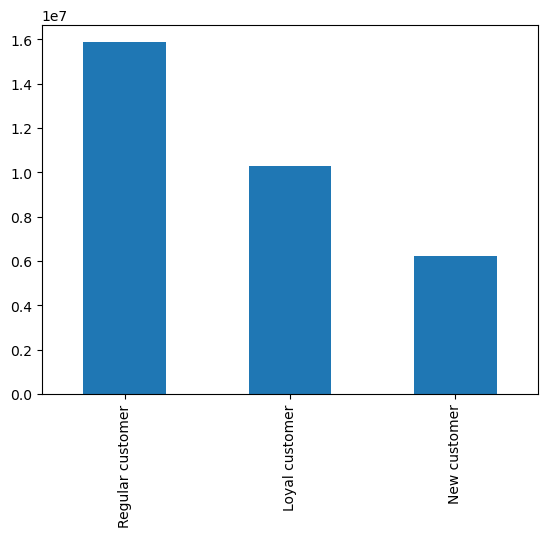

In [16]:
# Creating a bar chart
cust_loyalty = instacart['loyalty_flag'].value_counts().plot.bar()

In [17]:
# Creating the frequency table:
instacart['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

There are 15'876'776 orders placed by regular customers, 10'284'093 by loyal customers and 6'243'990 by new customers.

In [33]:
# Exporting the bar chart:
cust_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_loyalty.png'))

# 05. Expenditure by hour

## Task 5

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [19]:
# Set the seed for the random number generator
np.random.seed(4)

In [20]:
# Creating a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(instacart)) <= 0.7

In [21]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
# Store 70% of the sample in the dataframe big
big = instacart[dev]

In [24]:
# Store 30% of the sample in the dataframe small
small = instacart[~dev]

In [25]:
# Check of the length of the main dataframe:
len(instacart)

32404859

In [26]:
# Check if the big and small df have the same length:
len(big) + len(small)

32404859

In [28]:
# Creating a new dataframe, df_line, that contains only the “prices” and “order_hour_of_day” columns from the small subset:
df_line = small[['order_hour_of_day', 'prices']]

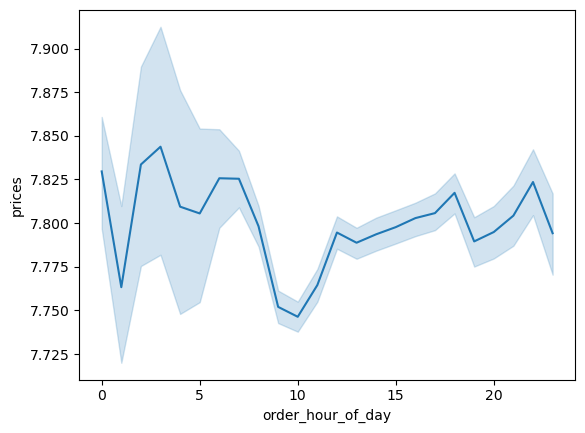

In [30]:
# Creating a line chart
line = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices')

In [31]:
# Creating a new dataframe, df_line_2, that contains only the “prices” and “order_hour_of_day” columns from the big subset:
df_line_2 = big[['order_hour_of_day', 'prices']]

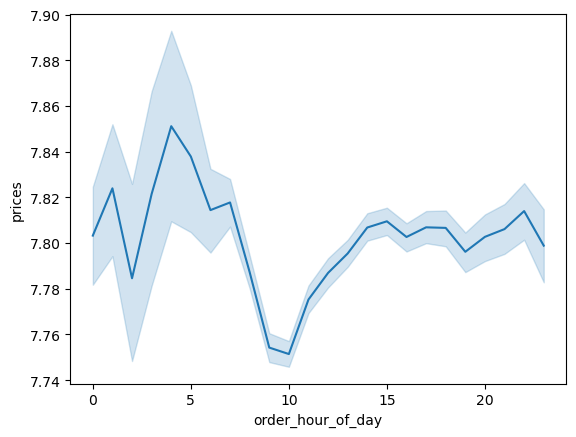

In [32]:
# Creating a line chart
line_2 = sns.lineplot(data = df_line_2, x = 'order_hour_of_day', y = 'prices')

Based on the sample taken from the instacart dataframe, I have created two line charts above. They are very similar, so we can assume both are accurate. 

We see that the lowest prices are around 9-10h, which makes sense, as at this  times there are the highest number of orders placed, making the average price low. On the contrary, during the night hours (0-6h) the average prices are high, which can be driven by the small number of orders places. We can assume that the small number of customers placing orders during the night order more expensive products on average.

In [34]:
# Exporting the line chart:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_exp_by_hour.png'))

# 06. Customer demographics

## Task 6

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

    In a markdown cell beneath your line chart, describe what the line chart shows.


## Age vs family situation

In [37]:
# Creating a new dataframe, df_age_dep, that contains only the “age” and “number_of_dependants” columns from the small subset:
df_age_dep = small[['age', 'number_of_dependants']]

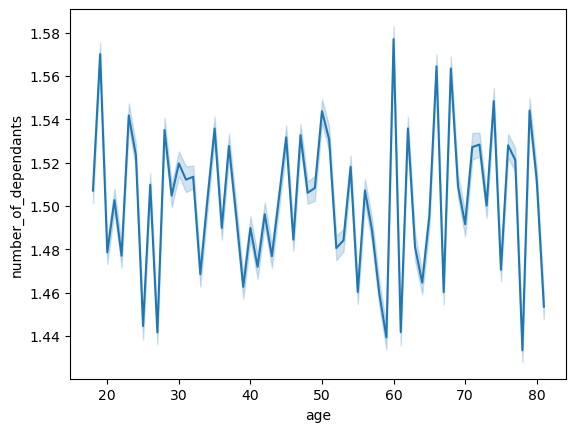

In [42]:
# Creating a line chart
line_age_dep = sns.lineplot(data = df_age_dep, y = 'number_of_dependants', x = 'age')

The line chart shows the number of dependends per customer by their age. 

From the line chart we cannot see any particular pattern. It seems there is no correlation between age of the customers and the number of their dependents.

In [43]:
# Exporting the line chart:
line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

## Task 7

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

    In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


In [44]:
# Creating a new dataframe, df_age_dep, that contains only the “age” and “income” columns from the small subset:
df_age_income = small[['age', 'income']]

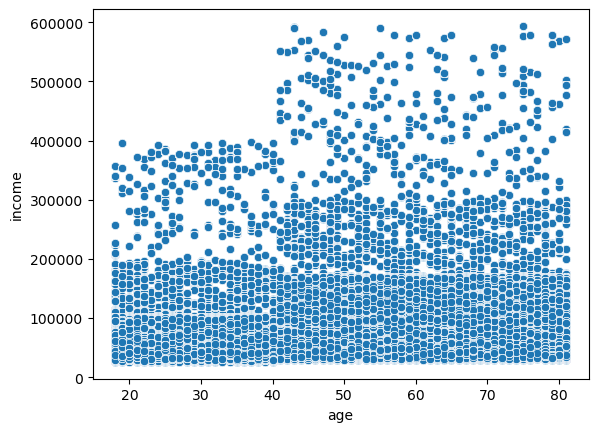

In [48]:
# Creating a scatterplot
scatterplot_age_income = sns.scatterplot(data = df_age_income, x = 'age', y = 'income')

The scatterplot shows the income levels by age of the customers.

There seems to be a slight positive correlation between the income and the age. The exact number would have to be calculated. However, the majority of the income is below 200'000 for all age groups and below 300'000 for customers above 40. As seen before, the minority of customers are earning more than 300'000 (outliers).

In [49]:
# Exporting the scatterplot:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))